In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

plt.rcParams.update({
        "font.size": 20,
        "axes.labelsize": 20,
        "axes.titlesize": 20,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
        "figure.dpi": 300,
    })

data_dir = "../results/entangling_capability/"
#data_dir = "../results/expressibility/"
records = []

for filename in os.listdir(data_dir):
    if filename.endswith(".json"):
        with open(os.path.join(data_dir, filename), 'r') as f:
            d = json.load(f)
            if "entangling" in data_dir:
            # Adjust these keys as needed for your data structure
                for nqubit, depths in d.items():
                    for depth, ansatzes in depths.items():
                        for ansatz, result in ansatzes.items():
                            orig = result["original"]
                            for subgroup, vals in result["twirled"].items():
                                records.append({
                                    "depth": int(depth),
                                    "ansatz": int(ansatz),
                                    "subgroup": int(subgroup),
                                    "mean": np.mean(vals),
                                    "std": np.std(vals),
                                    "original": orig
                                })
            elif "expressibility" in data_dir:
                for depth, ansatzes in d.items():
                    for ansatz, result in ansatzes.items():
                        orig = result["original"]
                        for subgroup, vals in result["twirled"].items():
                            records.append({
                                "depth": int(depth),
                                "ansatz": int(ansatz),
                                "subgroup": int(subgroup),
                                "mean": np.mean(vals),
                                "std": np.std(vals),
                                "original": orig
                            })

In [2]:
import pandas as pd
df = pd.DataFrame(records)

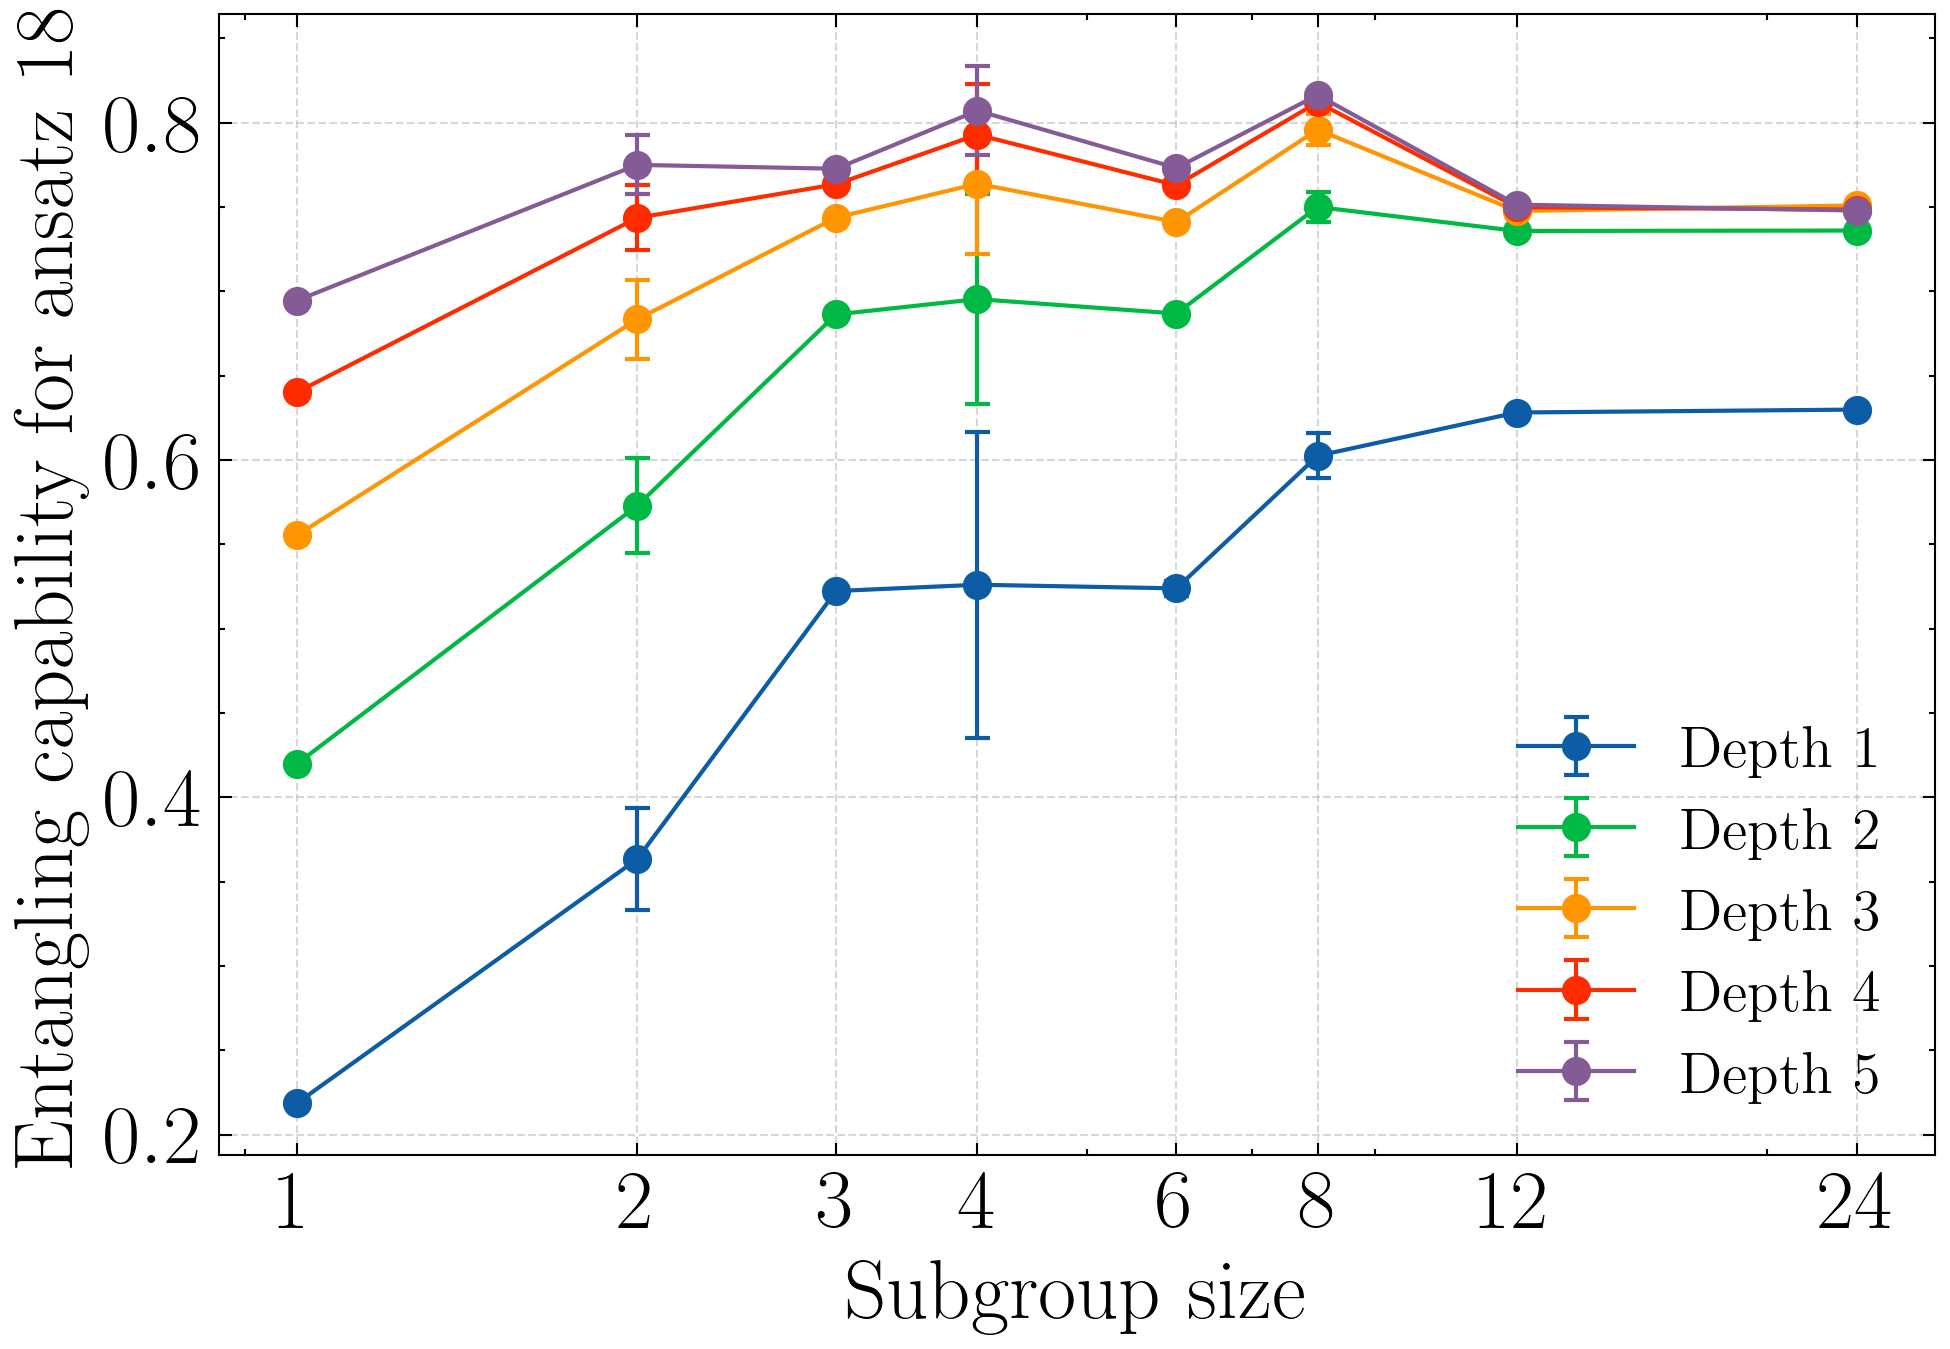

In [3]:
fixed_ansatz = 18

plt.figure(figsize=(7,5))
for depth in sorted(df["depth"].unique()):
    subset = df[(df["ansatz"] == fixed_ansatz) & (df["depth"] == depth)]
    if len(subset) == 0:
        continue
    # Sort by subgroup for plotting
    subset = subset.sort_values("subgroup")
    plt.errorbar(subset["subgroup"], subset["mean"], yerr=subset["std"], 
                 fmt='o-', capsize=3, label=f"Depth {depth}")

plt.xscale("log")
plt.xlabel("Subgroup size")
if "entangling_capability" in data_dir:
    plt.ylabel(f"Entangling capability for ansatz {fixed_ansatz}")
else:
    plt.yscale("log")
    plt.ylabel(f"Expressibility for ansatz {fixed_ansatz}")

plt.legend(fontsize=14, frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)
subgroup_values = sorted(df["subgroup"].unique())
plt.xticks(subgroup_values, labels=[str(x) for x in subgroup_values], rotation=0)
plt.tight_layout()
plt.show()